# Playing with Random Walkers

### "This *code* is made for walking, and that's just what it'll do"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.draw as draw
import skimage.color as color
%matplotlib inline

In [3]:
! curl -O http://news.erau.edu/-/media/images/news/nicole-stott-astronaut-photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92798  100 92798    0     0   265k      0 --:--:-- --:--:-- --:--:--  264k 0      0 --:--:-- --:--:-- --:--:--     0


In [4]:
img = plt.imread('nicole-stott-astronaut-photo.jpg')

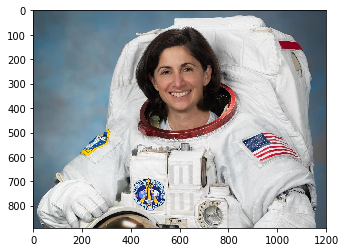

In [5]:
plt.imshow(img)

In [6]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    #ax.axis('off')
    return fig, ax

(<matplotlib.figure.Figure at 0x1c1a7f0390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c1afaa048>)

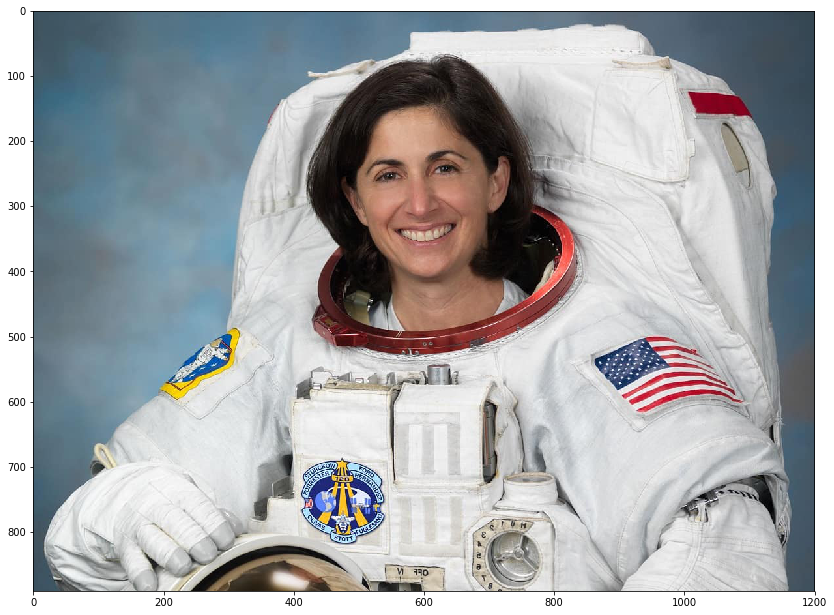

In [7]:
image_show(img)

In [21]:
image_gray = color.rgb2gray(img) 
#image_show(image_gray);

In [9]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

In [41]:
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [270, 605],150)[:-1]

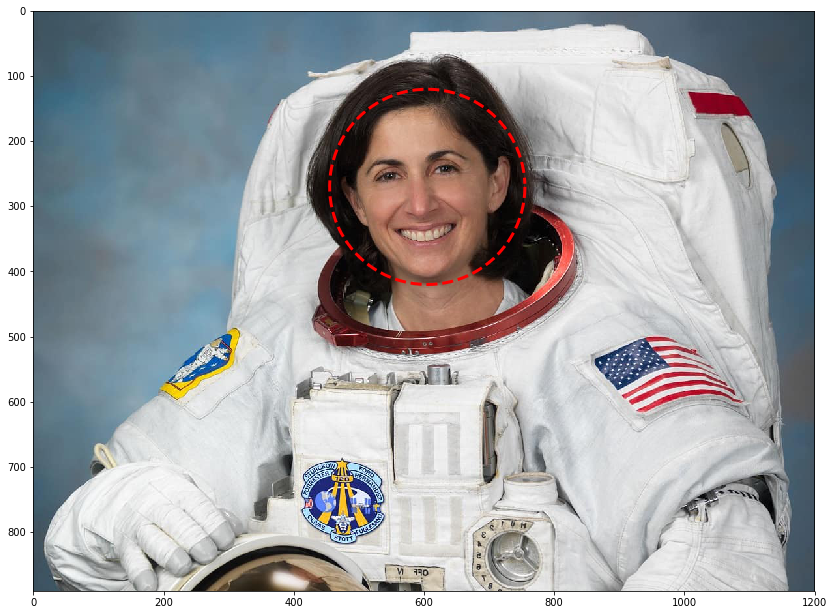

In [42]:
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

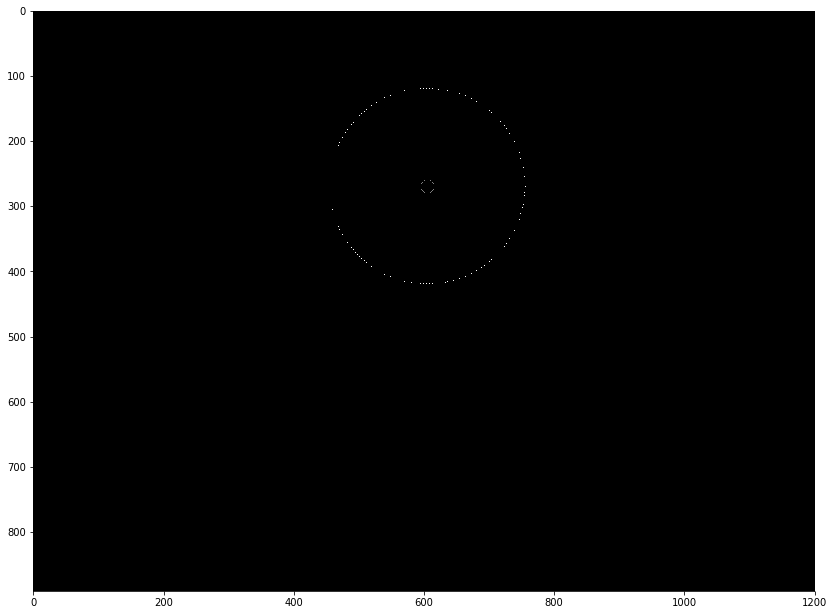

In [43]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)
indices = draw.circle_perimeter(270, 605,10)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

In [44]:
#print(indices)
#print(points)

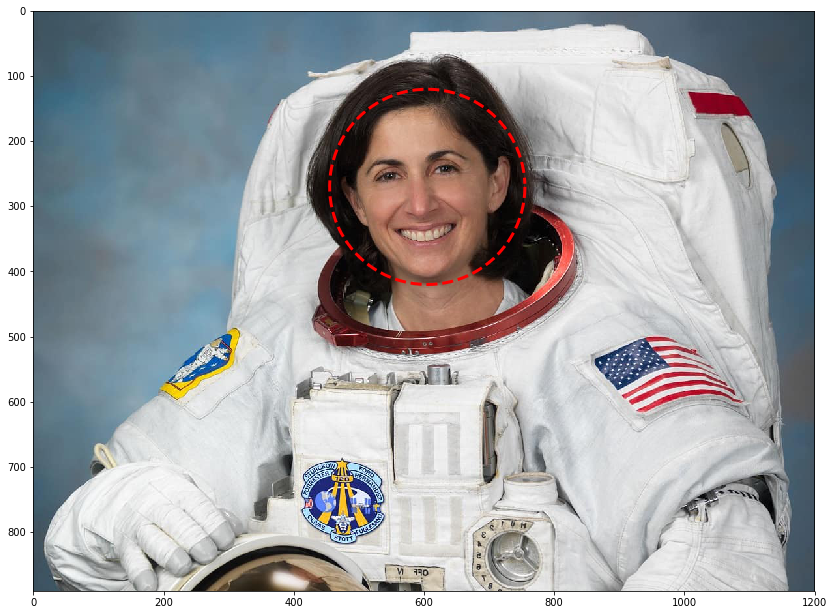

In [45]:
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
#ax.plot(indices[:, 0], indices[:, 1], '--b', lw=3)

In [20]:
#image_show(img)

In [16]:
image_segmented = seg.random_walker(image_gray, image_labels)

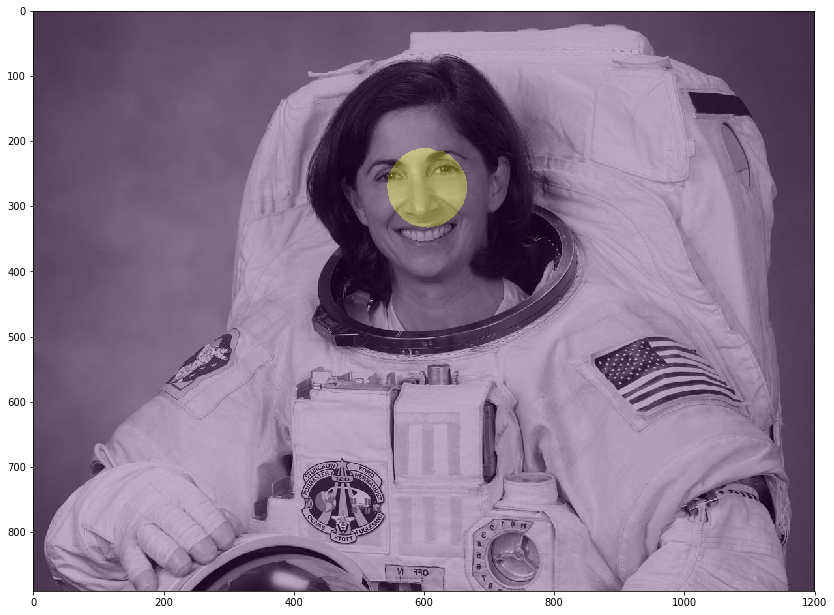

In [53]:
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);
fig.savefig('astronaut_bad_segmented.png')

In [18]:
image_segmented2 = seg.random_walker(image_gray, image_labels, beta=150000)

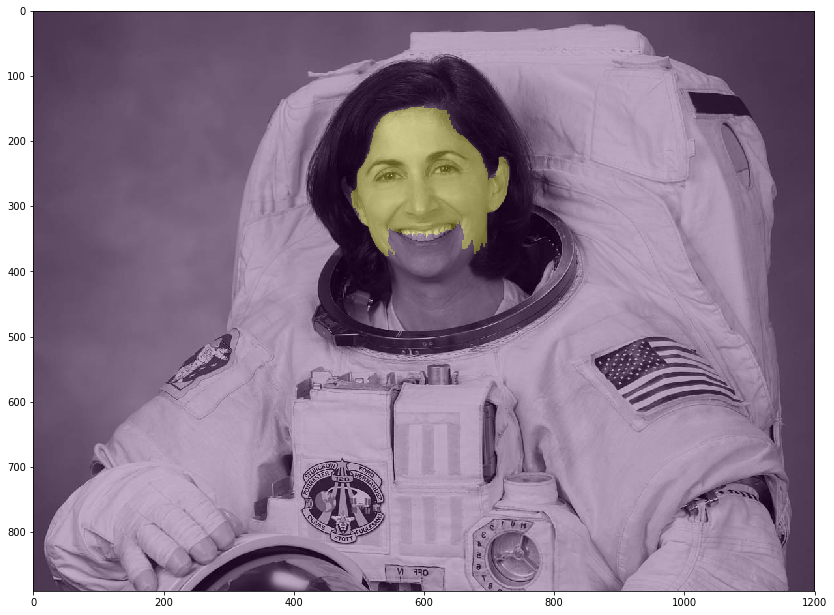

In [52]:
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented2 == 1, alpha=0.3);
fig.savefig('astronaut_segmented.png')

In [50]:
image_segmented3 = seg.random_walker(image_gray, image_labels, beta=500000)

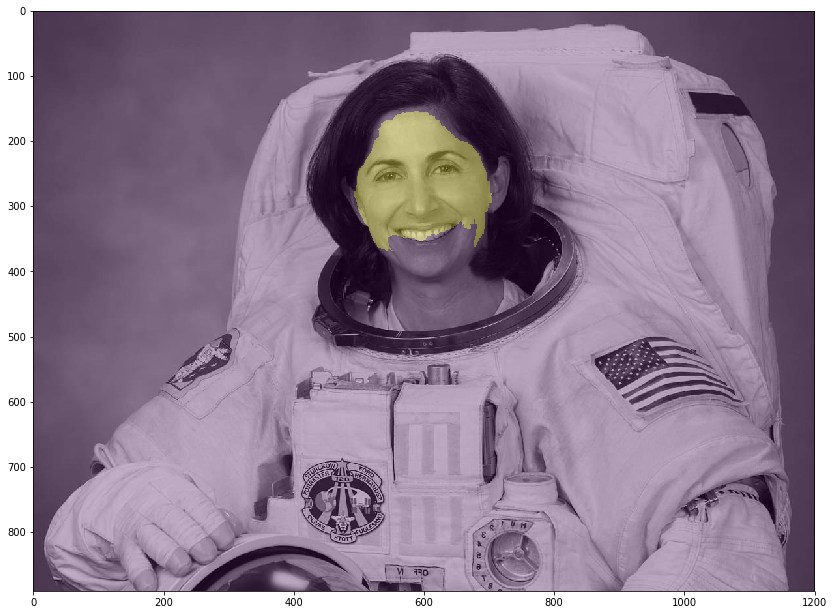

In [51]:
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented3 == 1, alpha=0.3);

In [45]:
"""
from PIL import Image

# Function to change the image size
def changeImageSize(maxWidth, 
                    maxHeight, 
                    image):
    
    widthRatio  = maxWidth/image.shape[0]
    heightRatio = maxHeight/image.shape[1]

    newWidth    = int(widthRatio*image.shape[0])
    newHeight   = int(heightRatio*image.shape[1])

    newImage    = image
    np.resize(newImage, (newWidth, newHeight))
    return newImage
    
image1 = img
image2 = image_labels

# Make the images of uniform size
image3 = changeImageSize(800, 500, image1)
image4 = changeImageSize(800, 500, image2)

# Make sure images got an alpha channel
#image5 = image3.convert("RGBA")
#image6 = image4.convert("RGBA")

# Display the images
image_show(image3)
image_show(image4)

# alpha-blend the images with varying values of alpha
alphaBlended1 = Image.blend(image3, image4, alpha=.2)
alphaBlended2 = Image.blend(image3, image4, alpha=.4)

# Display the alpha-blended images
alphaBlended1.show()
alphaBlended2.show()
"""

'\nfrom PIL import Image\n\n# Function to change the image size\ndef changeImageSize(maxWidth, \n                    maxHeight, \n                    image):\n    \n    widthRatio  = maxWidth/image.shape[0]\n    heightRatio = maxHeight/image.shape[1]\n\n    newWidth    = int(widthRatio*image.shape[0])\n    newHeight   = int(heightRatio*image.shape[1])\n\n    newImage    = image\n    np.resize(newImage, (newWidth, newHeight))\n    return newImage\n    \nimage1 = img\nimage2 = image_labels\n\n# Make the images of uniform size\nimage3 = changeImageSize(800, 500, image1)\nimage4 = changeImageSize(800, 500, image2)\n\n# Make sure images got an alpha channel\n#image5 = image3.convert("RGBA")\n#image6 = image4.convert("RGBA")\n\n# Display the images\nimage_show(image3)\nimage_show(image4)\n\n# alpha-blend the images with varying values of alpha\nalphaBlended1 = Image.blend(image3, image4, alpha=.2)\nalphaBlended2 = Image.blend(image3, image4, alpha=.4)\n\n# Display the alpha-blended images\na

In [32]:
img.shape[0]

891